Инициализация всех модулей

In [2]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import re
from pymystem3 import Mystem

ModuleNotFoundError: No module named 'nltk'

Для проверки на GPU.
Возвращает [] в случае, если карта не обнаружена. Иначе возвращает список всех доступных карт

In [3]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Загрузка датасета и перевод в формат, пригодный для нейросети

In [77]:
# Load your data (modify the file path accordingly)
df = pd.read_csv('./labeled.csv')

# Extract content and toxic columns
X = df['comment']
X = X.str.replace(r'\n$', '', regex=True)


# Initialize the Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['comment'])  # Fit on the texts

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(df['comment'])

# Define the maximum number of words (you can adjust this)
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100  # Adjust based on your needs

# Pad sequences to ensure uniform input size
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


Конфигурация RNN для поставленной задачи и её обучение

In [83]:
model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=128, input_length=MAX_SEQUENCE_LENGTH))
model.add(SimpleRNN(units=64))  # You can adjust units based on your needs
model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X, y, 
                    epochs=25, 
                    batch_size=512, 
                    validation_split=0.2,  # Use 20% of the data for validation
                    verbose=1)  # Print progress

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6185 - loss: 0.6488 - val_accuracy: 0.6857 - val_loss: 0.5798
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7206 - loss: 0.5533 - val_accuracy: 0.7617 - val_loss: 0.4445
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7280 - loss: 0.5306 - val_accuracy: 0.7856 - val_loss: 0.4777
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8970 - loss: 0.3318 - val_accuracy: 0.8054 - val_loss: 0.4228
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9527 - loss: 0.1774 - val_accuracy: 0.8033 - val_loss: 0.4507
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9799 - loss: 0.0935 - val_accuracy: 0.7912 - val_loss: 0.4782
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9848 - loss: 0.0616 - val_accuracy: 0.7860 - val_loss: 0.5214
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9892 - loss: 0.0451 - val_accuracy: 0.7815 - v

Анализ результатов обучения сети

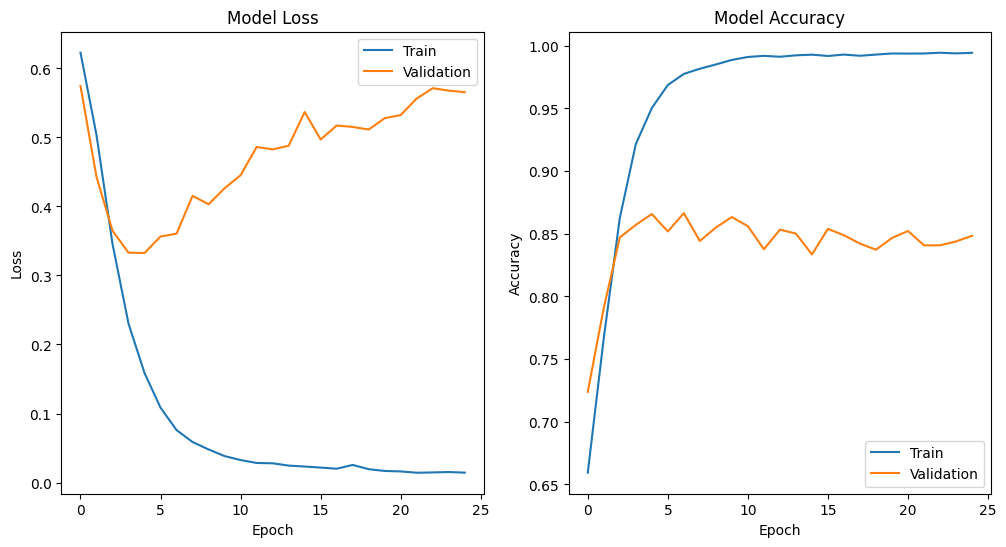

In [80]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


Пример пользовательского predict

In [86]:
# Example new content
new_content = input('Введите комментарий: ').split()

# Tokenize and pad the new content
new_sequences = tokenizer.texts_to_sequences(new_content)
new_padded = pad_sequences(new_sequences, maxlen=100)

# Tokenize and pad the new content
new_sequences = tokenizer.texts_to_sequences(new_content)
new_padded = pad_sequences(new_sequences, maxlen=100)  # Ensure maxlen matches the training padding length

# Predict the probabilities
predictions = model.predict(new_content)

print(predictions)



Введите комментарий:  как дела?


ValueError: Unrecognized data type: x=['как', 'дела?'] (of type <class 'list'>)